In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
import os

In [17]:
os.chdir("D:\\meridianthe4\\PML\\Datasets")

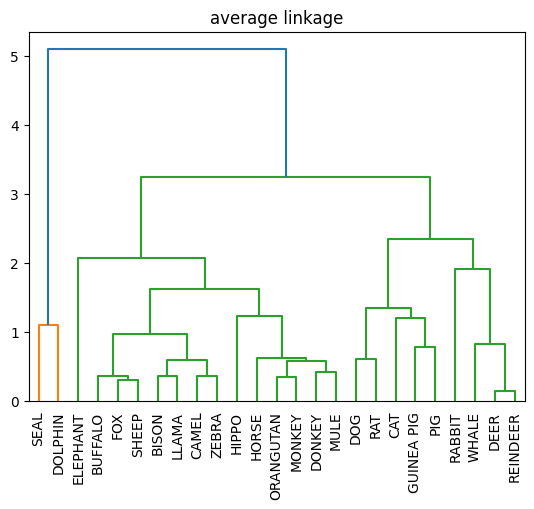

In [18]:
milk = pd.read_csv("milk.csv", index_col=0)
scaler = StandardScaler().set_output(transform="pandas")
df_scaled = scaler.fit_transform(milk)
link = "average"
mergings = linkage(df_scaled, method=link)
dendrogram(mergings, labels=list(df_scaled.index))
plt.title(link+" linkage")
plt.xticks(rotation=90)
plt.show()

In [19]:
link = "average"
clust = AgglomerativeClustering(n_clusters=2, linkage=link)
clust.fit(df_scaled)
silhouette_score(df_scaled, labels=clust.labels_)

0.5186847578981009

In [20]:
linkages = ["single", "complete", "average", "ward"]
clusters = [2, 3, 4, 5, 6, 7, 8]
scores = []
for link in linkages:
    for n_clust in clusters:
        clust = AgglomerativeClustering(n_clusters=n_clust, linkage=link)
        clust.fit(df_scaled)
        score = silhouette_score(df_scaled, labels=clust.labels_)
        scores.append([link, n_clust, score])
df_scores = pd.DataFrame(scores, columns=["linkage", "n_clusters", "score"])
df_scores.sort_values("score", ascending=False)

,linkage,n_clusters,score
22,ward,3,0.539160
21,ward,2,0.525851
0,single,2,0.518685
14,average,2,0.518685
15,average,3,0.487576
8,complete,3,0.487576
7,complete,2,0.455789
23,ward,4,0.443481
11,complete,6,0.419614
9,complete,4,0.416015


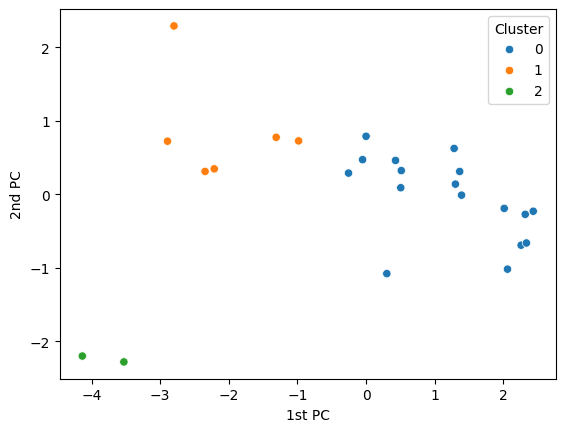

In [21]:
pccomp = PCA().set_output(transform='pandas')
pcdata = pccomp.fit_transform(df_scaled)
clust = AgglomerativeClustering(n_clusters=3, linkage='ward')
clust.fit(df_scaled)
pcdata = pcdata.iloc[:,:2]
pcdata['Cluster'] = clust.labels_
pcdata['Cluster'] = pcdata['Cluster'].astype('str')
sns.scatterplot(data=pcdata, x='pca0', y='pca1', hue='Cluster')
plt.xlabel('1st PC')
plt.ylabel('2nd PC')
plt.show()

#### Nutrients

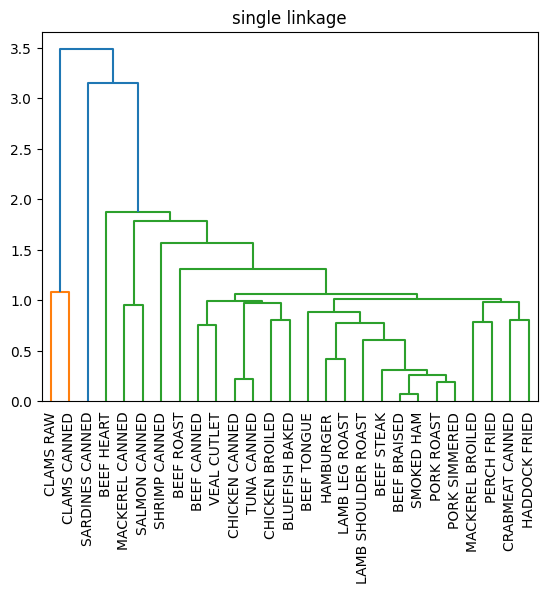

In [27]:
nut = pd.read_csv("nutrient.csv", index_col=0)
scaler = StandardScaler().set_output(transform="pandas")
df_scaled = scaler.fit_transform(nut)
link = "single"
mergings = linkage(df_scaled, method=link)
dendrogram(mergings, labels=list(df_scaled.index))
plt.title(link+" linkage")
plt.xticks(rotation=90)
plt.show()

In [28]:
linkages = ["single", "complete", "average", "ward"]
clusters = [2, 3, 4, 5, 6, 7, 8]
scores = []
for link in linkages:
    for n_clust in clusters:
        clust = AgglomerativeClustering(n_clusters=n_clust, linkage=link)
        clust.fit(df_scaled)
        score = silhouette_score(df_scaled, labels=clust.labels_)
        scores.append([link, n_clust, score])
df_scores = pd.DataFrame(scores, columns=["linkage", "n_clusters", "score"])
df_scores.sort_values("score", ascending=False)

,linkage,n_clusters,score
0,single,2,0.448342
1,single,3,0.445319
15,average,3,0.445319
9,complete,4,0.415801
23,ward,4,0.415801
14,average,2,0.413451
13,complete,8,0.404794
20,average,8,0.404794
22,ward,3,0.403730
8,complete,3,0.403730


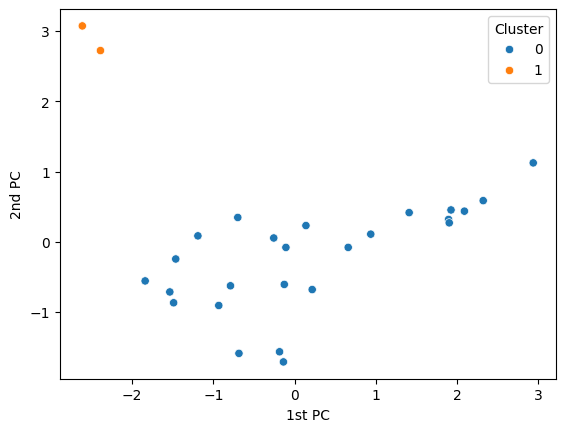

In [29]:
pccomp = PCA().set_output(transform='pandas')
pcdata = pccomp.fit_transform(df_scaled)
clust = AgglomerativeClustering(n_clusters=2, linkage='single')
clust.fit(df_scaled)
pcdata = pcdata.iloc[:,:2]
pcdata['Cluster'] = clust.labels_
pcdata['Cluster'] = pcdata['Cluster'].astype('str')
sns.scatterplot(data=pcdata, x='pca0', y='pca1', hue='Cluster')
plt.xlabel('1st PC')
plt.ylabel('2nd PC')
plt.show()